# Titanic spaceship with machine learning

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
# import libraries 
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# import Data source 
train_data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [4]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [8]:
missing_data = train_data.isnull()
missing_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
for col in missing_data.columns.values.tolist():
    print(missing_data[[col]].value_counts())
    print('-------------------------------')

PassengerId
False          8693
dtype: int64
-------------------------------
HomePlanet
False         8492
True           201
dtype: int64
-------------------------------
CryoSleep
False        8476
True          217
dtype: int64
-------------------------------
Cabin
False    8494
True      199
dtype: int64
-------------------------------
Destination
False          8511
True            182
dtype: int64
-------------------------------
Age  
False    8514
True      179
dtype: int64
-------------------------------
VIP  
False    8490
True      203
dtype: int64
-------------------------------
RoomService
False          8512
True            181
dtype: int64
-------------------------------
FoodCourt
False        8510
True          183
dtype: int64
-------------------------------
ShoppingMall
False           8485
True             208
dtype: int64
-------------------------------
Spa  
False    8510
True      183
dtype: int64
-------------------------------
VRDeck
False     8505
True       188


In [10]:
train_data[['HomePlanet']].value_counts(dropna=False)

HomePlanet
Earth         4602
Europa        2131
Mars          1759
NaN            201
dtype: int64

In [11]:
cont_table = pd.crosstab(train_data['HomePlanet'], train_data['Transported'])
stats.chi2_contingency(cont_table, correction=True)[1]

2.809059985251311e-71

In [12]:
train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0], inplace=True)

In [13]:
test_data['HomePlanet'].fillna(test_data['HomePlanet'].mode()[0], inplace = True)

In [14]:
train_data['CryoSleep'].value_counts(dropna=False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

In [15]:
cryo_cont_table = pd.crosstab(train_data['CryoSleep'], train_data['Transported'])
stats.chi2_contingency(cryo_cont_table, correction=True)

(1859.6127129888841,
 0.0,
 1,
 array([[2697.68239736, 2741.31760264],
        [1506.31760264, 1530.68239736]]))

In [16]:
train_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0], inplace=True)
test_data['CryoSleep'].fillna(test_data['CryoSleep'].mode()[0], inplace = True)

In [17]:
train_data[['Cabin']].head()

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S


In [18]:
train_data['Cabin'].fillna('0/0/0', inplace = True)
test_data['Cabin'].fillna('0/0/0', inplace = True)

In [19]:
train_data[['Destination']].value_counts(dropna=False)

Destination  
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
dtype: int64

In [20]:
train_data['Destination'].fillna(train_data['Destination'].mode()[0], inplace=True)
test_data['Destination'].fillna(test_data['Destination'].mode()[0], inplace=True)

In [21]:
train_data[['Age']].head()

,Age
0,39.0
1,24.0
2,58.0
3,33.0
4,16.0


In [22]:
type(train_data['Age'].mean())

numpy.float64

In [23]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace = True)

In [24]:
train_data[['VIP']].value_counts(dropna=False)

VIP  
False    8291
NaN       203
True      199
dtype: int64

In [25]:
train_data['VIP'].fillna(train_data['VIP'].mode()[0], inplace = True)
test_data['VIP'].fillna(test_data['VIP'].mode()[0], inplace = True)

In [26]:
#RoomService
train_data['RoomService'].fillna(0.0, inplace=True)
test_data['RoomService'].fillna(0.0, inplace=True)

#FoodCourt
train_data['FoodCourt'].fillna(0.0, inplace=True)
test_data['FoodCourt'].fillna(0.0, inplace=True)

#ShoppingMall
train_data['ShoppingMall'].fillna(0.0, inplace=True)
test_data['ShoppingMall'].fillna(0.0, inplace=True)

#Spa
train_data['Spa'].fillna(0.0, inplace=True)
test_data['Spa'].fillna(0.0, inplace=True)

#VRDeck
train_data['VRDeck'].fillna(0.0, inplace=True)
test_data['VRDeck'].fillna(0.0, inplace=True)

In [27]:
train_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [28]:
train_data[['Age']].describe()

,Age
count,8693.000000
mean,28.827930
std,14.339054
min,0.000000
25%,20.000000
50%,27.000000
75%,37.000000
max,79.000000


<AxesSubplot:xlabel='Transported', ylabel='Age'>

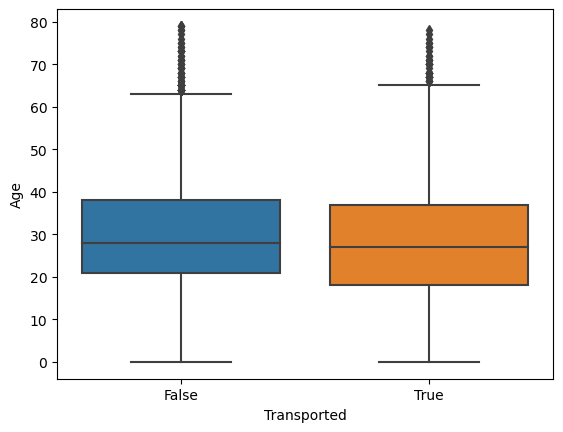

In [29]:
sns.boxplot(x='Transported', y='Age', data=train_data)

In [30]:
bins = np.linspace(train_data['Age'].min(), train_data['Age'].max(), 3)
bins

array([ 0. , 39.5, 79. ])

In [31]:
labels = ['young', 'old']
train_data['Age'] = pd.cut(train_data['Age'], bins=bins, labels=labels, include_lowest=True)

In [32]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,young,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,young,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,old,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,young,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,young,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [33]:
test_data['Age'] = pd.cut(test_data['Age'], bins=bins, labels=labels, include_lowest=True)

In [34]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,young,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,young,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,young,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,young,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,young,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [35]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,young,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,young,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,old,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,young,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,young,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [36]:
passenger_id = test_data['PassengerId']

In [37]:
def drops_col(df):
    """
    The folllowing function drops the passengeriD and Name columns from a dataframe
    and returns the dataframe
    """   
    df.drop('PassengerId', axis=1, inplace=True)
    df.drop('Name', axis=1, inplace=True)
    
    return df

In [38]:
fe_train_data = drops_col(train_data)
fe_test_data = drops_col(test_data)

In [39]:
def cabin_col(df):
    """
    The function takes in a dataframe, splits the cabin column into two the cabin deck and cabin side
    it appends the two into the dataframe, drops the cabin column and returns the dataframe
    """
    cabin_list = df['Cabin'].to_list()
    deck = []
    side = []
    
    for i in cabin_list:
        deck.append(i.split('/')[0])
        side.append(i.split('/')[-1])
        
    df['cabin_deck'] = deck
    df['cabin_side'] = side
    
    df.drop('Cabin', axis=1, inplace=True)
    
    return df

In [40]:
fe_train_data = cabin_col(fe_train_data)
fe_test_data = cabin_col(fe_test_data)

In [41]:
def total_ammenities(df):
    """
    The following takes in a dataframe and adds all the ammenties used into one column called amenities,
    drops the individual ammenities and returns the dataframe
    """
    df['total_amenities'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
    
    df.drop('RoomService', axis = 1, inplace = True)
    df.drop('FoodCourt', axis = 1, inplace = True)
    df.drop('ShoppingMall', axis = 1, inplace = True)
    df.drop('Spa', axis = 1, inplace = True)
    df.drop('VRDeck', axis = 1, inplace = True)
    
    return df
  

In [42]:
fe_train_data = total_ammenities(fe_train_data)
fe_test_data = total_ammenities(fe_test_data)

In [43]:
fe_train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,cabin_deck,cabin_side,total_amenities
0,Europa,False,TRAPPIST-1e,young,False,False,B,P,0.0
1,Earth,False,TRAPPIST-1e,young,False,True,F,S,736.0
2,Europa,False,TRAPPIST-1e,old,True,False,A,S,10383.0
3,Europa,False,TRAPPIST-1e,young,False,False,A,S,5176.0
4,Earth,False,TRAPPIST-1e,young,False,True,F,S,1091.0


In [44]:
hp_cont_table = pd.crosstab(fe_train_data['HomePlanet'], fe_train_data['Transported'])
hp_p_value = stats.chi2_contingency(hp_cont_table, correction=True)[1]

if hp_p_value < 0.05:
    print('The p_value is ', hp_p_value, 'There is evidence of association between the variables')
else:
    print('The p_value is ', hp_p_value, 'There is no evidence of association between the variables')  

The p_value is  5.549631517016864e-70 There is evidence of association between the variables


In [45]:
cs_cont_table = pd.crosstab(fe_train_data['CryoSleep'], fe_train_data['Transported'])
cs_p_value = stats.chi2_contingency(cs_cont_table, correction=True)[1]

if cs_p_value < 0.05:
    print('The p_value is ', cs_p_value, 'There is evidence of association between the variables')
else:
    print('The p_value is ', cs_p_value, 'There is no evidence of association between the variables') 

The p_value is  0.0 There is evidence of association between the variables


In [46]:
d_cont_table = pd.crosstab(fe_train_data['Destination'], fe_train_data['Transported'])
d_p_value = stats.chi2_contingency(d_cont_table, correction=True)[1]

if d_p_value < 0.05:
    print('The p_value is ', d_p_value, 'There is evidence of association between the variables')
else:
    print('The p_value is ', d_p_value, 'There is no evidence of association between the variables') 

The p_value is  1.1947894351445014e-23 There is evidence of association between the variables


In [47]:
ag_cont_table = pd.crosstab(fe_train_data['Age'], fe_train_data['Transported'])
ag_p_value = stats.chi2_contingency(ag_cont_table, correction=True)[1]

if ag_p_value < 0.05:
    print('The p_value is ', ag_p_value, 'There is evidence of association between the variables')
else:
    print('The p_value is ', ag_p_value, 'There is no evidence of association between the variables') 

The p_value is  0.5743217143672246 There is no evidence of association between the variables


In [48]:
vip_cont_table = pd.crosstab(fe_train_data['VIP'], fe_train_data['Transported'])
vip_p_value = stats.chi2_contingency(vip_cont_table, correction=True)[1]

if vip_p_value < 0.05:
    print('The p_value is ', vip_p_value, 'There is evidence of association between the variables')
else:
    print('The p_value is ', vip_p_value, 'There is no evidence of association between the variables') 

The p_value is  0.0006681023600149099 There is evidence of association between the variables


In [49]:
cd_cont_table = pd.crosstab(fe_train_data['cabin_deck'], fe_train_data['Transported'])
cd_p_value = stats.chi2_contingency(cd_cont_table, correction=True)[1]

if cd_p_value < 0.05:
    print('The p_value is ', cd_p_value, 'There is evidence of association between the variables')
else:
    print('The p_value is ', cd_p_value, 'There is no evidence of association between the variables') 

The p_value is  8.352488438720223e-80 There is evidence of association between the variables


In [50]:
cs_cont_table = pd.crosstab(fe_train_data['cabin_side'], fe_train_data['Transported'])
cs_p_value = stats.chi2_contingency(cs_cont_table, correction=True)[1]

if cs_p_value < 0.05:
    print('The p_value is ', cs_p_value, 'There is evidence of association between the variables')
else:
    print('The p_value is ', cs_p_value, 'There is no evidence of association between the variables') 

The p_value is  1.3690336728997533e-20 There is evidence of association between the variables


Text(0.5, 1.0, 'Relationship Between Total Amount Spent on Amenities and Transported')

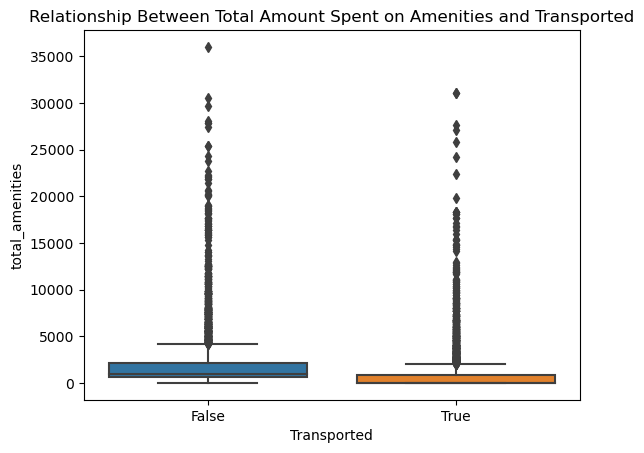

In [51]:
sns.boxplot(x='Transported', y='total_amenities', data = fe_train_data)
plt.title('Relationship Between Total Amount Spent on Amenities and Transported')

In [52]:
fe_train_data.drop('Age', axis=1, inplace=True)
fe_test_data.drop('Age', axis=1, inplace=True)

In [53]:
fe_train_data.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported',
       'cabin_deck', 'cabin_side', 'total_amenities'],
      dtype='object')

In [54]:
def one_hot_fun(df):
    hp_dum = pd.get_dummies(df['HomePlanet'], prefix='home_planet')
    cr_dum = pd.get_dummies(df['CryoSleep'], prefix='cryo_sleep')   
    ds_dum = pd.get_dummies(df['Destination'], prefix='destination')    
    vip_dum = pd.get_dummies(df['VIP'], prefix='vip')   
    cd_dum = pd.get_dummies(df['cabin_deck'], prefix='cabin_deck') 
    cs_dum = pd.get_dummies(df['cabin_side'], prefix='cabin_side')

    df = pd.concat([df, hp_dum, cr_dum, ds_dum, vip_dum, cd_dum, cs_dum], axis=1)
    
    df.drop(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'cabin_deck', 'cabin_side'],axis=1, inplace=True)
    
    return df

In [55]:
fe_train_data = one_hot_fun(fe_train_data)
fe_test_data = one_hot_fun(fe_test_data)

In [56]:
fe_train_data.head()

,Transported,total_amenities,home_planet_Earth,home_planet_Europa,home_planet_Mars,cryo_sleep_False,cryo_sleep_True,destination_55 Cancri e,destination_PSO J318.5-22,destination_TRAPPIST-1e,...,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T,cabin_side_0,cabin_side_P,cabin_side_S
0,False,0.0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,True,736.0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,False,10383.0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,False,5176.0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,True,1091.0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [57]:
fe_test_data.head()

,total_amenities,home_planet_Earth,home_planet_Europa,home_planet_Mars,cryo_sleep_False,cryo_sleep_True,destination_55 Cancri e,destination_PSO J318.5-22,destination_TRAPPIST-1e,vip_False,...,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T,cabin_side_0,cabin_side_P,cabin_side_S
0,0.0,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
1,2832.0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
2,0.0,0,1,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,7418.0,0,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
4,645.0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1


In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()
fe_train_data['total_amenities'] = scaler.fit_transform(fe_train_data[['total_amenities']])
fe_test_data['total_amenities'] = scaler.fit_transform(fe_test_data[['total_amenities']])

In [60]:
fe_train_data.head()

,Transported,total_amenities,home_planet_Earth,home_planet_Europa,home_planet_Mars,cryo_sleep_False,cryo_sleep_True,destination_55 Cancri e,destination_PSO J318.5-22,destination_TRAPPIST-1e,...,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T,cabin_side_0,cabin_side_P,cabin_side_S
0,False,0.000000,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,True,0.020452,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,False,0.288521,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,False,0.143830,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,True,0.030317,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [61]:
fe_test_data.head()

,total_amenities,home_planet_Earth,home_planet_Europa,home_planet_Mars,cryo_sleep_False,cryo_sleep_True,destination_55 Cancri e,destination_PSO J318.5-22,destination_TRAPPIST-1e,vip_False,...,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T,cabin_side_0,cabin_side_P,cabin_side_S
0,0.000000,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
1,0.084120,1,0,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
2,0.000000,0,1,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0.220341,0,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
4,0.019159,1,0,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1


In [62]:
fe_train_data['Transported'].dtype

dtype('bool')

In [63]:
fe_train_data['Transported'] = list(map(int, fe_train_data['Transported']))

In [64]:
fe_train_data.head(3)

,Transported,total_amenities,home_planet_Earth,home_planet_Europa,home_planet_Mars,cryo_sleep_False,cryo_sleep_True,destination_55 Cancri e,destination_PSO J318.5-22,destination_TRAPPIST-1e,...,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T,cabin_side_0,cabin_side_P,cabin_side_S
0,0,0.000000,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,0.020452,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0.288521,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [65]:
# Model Selection
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [66]:
x = fe_train_data.drop('Transported', axis=1)
y = fe_train_data['Transported']

In [67]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=0)

In [68]:
forest_model = RandomForestClassifier()

In [69]:
# Without any tunning
forest_model.fit(x_train, y_train)
y_hat = forest_model.predict(x_val)
f1_score(y_val, y_hat)

0.7224080267558528

In [70]:
forest_params = [{'n_estimators':[500],
                'min_samples_leaf':[4]}]

forest_grid = GridSearchCV(estimator=forest_model, param_grid=forest_params, cv=5)
forest_grid.fit(x_train, y_train)
forest_grid.best_estimator_

RandomForestClassifier(min_samples_leaf=4, n_estimators=500)

In [71]:
forest_final = forest_grid.best_estimator_
y_preds = forest_final.predict(x_val)
f1_score(y_val, y_preds)

0.7401197604790418

In [72]:
fr_score = cross_val_score(forest_final, x, y, cv=5)
fr_score.mean()

0.7489951303309773

In [73]:
xg_model = XGBClassifier()

In [74]:
# Without any tunning
xg_model.fit(x_train, y_train)
y_hat = xg_model.predict(x_val)
f1_score(y_val, y_hat)

0.7307692307692308

In [75]:
xg_params = [{
    'n_estimators': [1000],
    'learning_rate': [0.05]}]

xg_grid = GridSearchCV(estimator=xg_model, param_grid=xg_params, cv=5)
xg_grid.fit(x_train, y_train)
xg_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [76]:
xg_final = xg_grid.best_estimator_
y_preds = xg_final.predict(x_val)
f1_score(y_val, y_preds)

0.7324613555291319

In [77]:
xg_score = cross_val_score(xg_final, x, y, cv=5)
xg_score.mean()

0.7381816726012793

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
neig = KNeighborsClassifier(n_neighbors=6)

In [80]:
neig.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [81]:
preds = neig.predict(x_val)

In [82]:
f1_score(y_val, preds)

0.6620879120879121

In [83]:
scores = []
k_value = []

for i in range(1, 21, 1):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    y_hat = knn_model.predict(x_val)
    f1 = f1_score(y_val, y_hat)
    scores.append(f1)
    k_value.append(i)

In [84]:
import plotly.express as px

In [85]:
fig = px.line(x=k_value, y=scores, labels={'x':'K Values', 'y':'F1 Scores'})
fig.show()

In [86]:
knn_final = KNeighborsClassifier(n_neighbors=15)
knn_score = cross_val_score(knn_final, x, y, cv=5)
knn_score.mean()

0.7232277720023479

In [87]:
final_model = knn_final
final_model.fit(x,y)
final_preds = final_model.predict(fe_test_data)

In [88]:
output = pd.DataFrame({'PassengerId':passenger_id,'Transported':final_preds})
output.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0


In [89]:
output['Transported'] = list(map(bool, output['Transported']))
output.head(2)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False


In [90]:
output.to_csv('submission.csv', index=False)
print("Success")

Success
